import packages

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


loading data

In [10]:
df=pd.read_csv("../data/raw/sierraleone-bumbuna.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


checking missing value

In [11]:

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

missing_counts=df.isna().sum()
total_rows = len(df)
columns_with_nulls = missing_counts[missing_counts / total_rows > 0.05]
print("Columns with more than 5% missing values:",columns_with_nulls)


Rows: 525600
Columns: 19
Columns with more than 5% missing values: Comments    525600
dtype: int64


Describe stat

In [12]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Outlier Detection

In [13]:
z_scores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
df[(abs(z_scores) > 3).any(axis=1)]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,NaN
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,NaN
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,NaN
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,NaN
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519235,2022-10-25 13:56,884.0,808.0,170.5,911.0,892.0,34.7,57.8,3.0,3.9,0.5,29.7,11.8,997,0,0.0,63.2,59.3,NaN
519236,2022-10-25 13:57,881.0,804.0,172.1,907.0,889.0,34.5,57.9,3.0,4.1,0.8,37.4,26.3,997,0,0.0,63.1,59.1,NaN
519237,2022-10-25 13:58,878.0,801.0,173.4,903.0,885.0,34.5,58.1,3.0,3.6,0.6,31.9,14.3,997,0,0.0,63.0,59.0,NaN
519238,2022-10-25 13:59,873.0,795.9,174.4,899.0,880.0,34.5,51.8,2.7,3.4,0.5,36.5,11.2,997,0,0.0,62.8,58.8,NaN


plotting

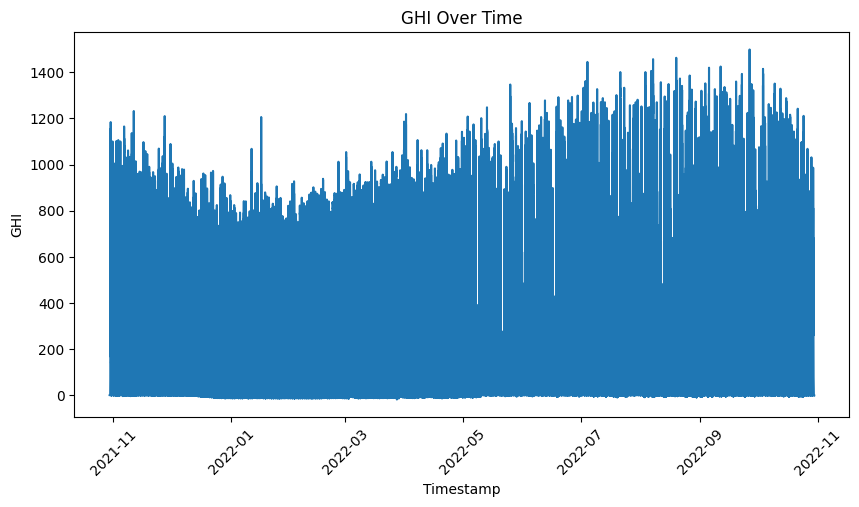

In [14]:
if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(10, 5))
sns.lineplot(x='Timestamp', y='GHI', data=df)
plt.title('GHI Over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.xticks(rotation=45)
plt.show()